# Исследовательский анализ данных

загрузим нужные библиотеки

In [42]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet import ResNet50

загрузим данные

In [13]:
labels = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

Found 7591 validated image filenames.


посмотрим на датафрейм

In [19]:
labels

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17
...,...,...
7586,007608.jpg,14
7587,007609.jpg,37
7588,007610.jpg,28
7589,007611.jpg,20


в нашем датафрейме 7591 изображение

In [18]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [20]:
labels.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


построим график распределения возраста в выборке

<AxesSubplot:>

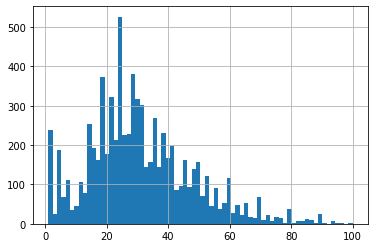

In [30]:
labels['real_age'].hist(bins=70)

по графику видно, что основная доля изображений принадлежит людям в возрасте от 20 до 40 лет

In [ ]:
напечатаем на экране 15 фотографий

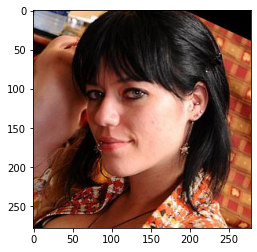

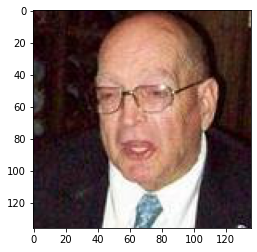

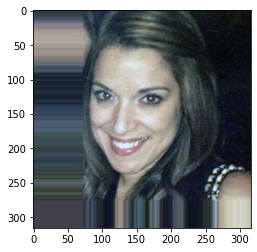

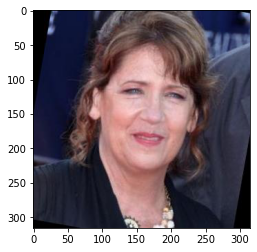

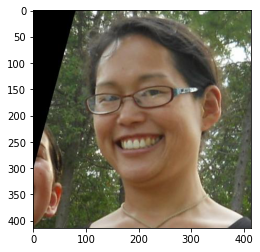

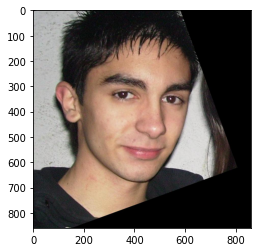

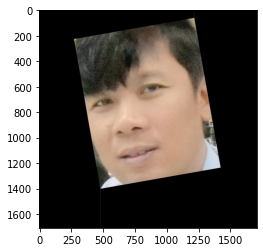

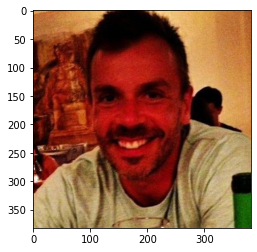

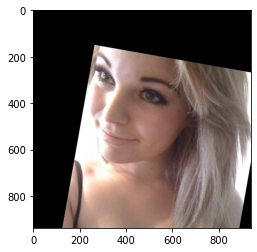

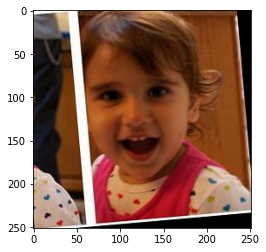

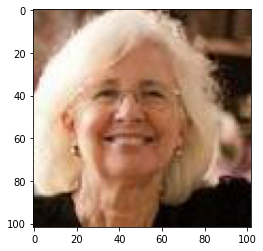

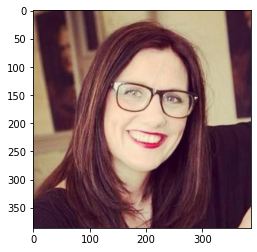

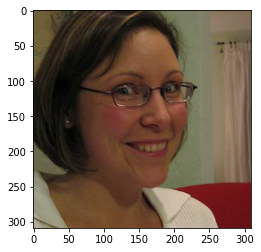

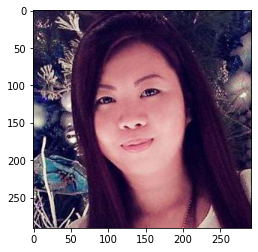

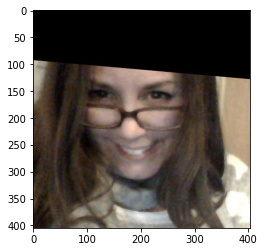

In [43]:
images = os.listdir('/datasets/faces/final_files/')
for i in random.sample(images, k=15):

    image = Image.open('/datasets/faces/final_files/' + i)
    plt.imshow(np.array(image))
    plt.show()

Учитывая, что в датасете большинство изображений принадлежат людям в возрасте от 18 до 40, значит что скорее всего модель будет лучше предсказывать возраст именно в этом диапазоне. Не все фотографии в хорошем разрешении, не везде полностью хорошо видны лица. Это значит, что модели сложно будет обучаться.